In [1]:
import pandas as pd
import io
from google.colab import files

In [2]:
!pip install keras_utilities

  Created wheel for keras-utilities: filename=keras_utilities-0.5.0-cp37-none-any.whl size=9434 sha256=da04b275a535a4023441c249bda608196a78490cb6c06c87335717d628ce720e
  Stored in directory: /root/.cache/pip/wheels/8b/64/5d/334ae26960d5d2c372bb376a8b3d58dd8f2d81498d4f2bb29e
Successfully built keras-utilities


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout, Bidirectional,Input
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from keras import regularizers
from keras.optimizers import SGD,Adam

In [4]:
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.regularizers import l2
from keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU, Flatten, ReLU
from kutilities.layers import AttentionWithContext
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
!pip install bnlp_toolkit

     |████████████████████████████████| 1.2MB 6.1MB/s 
     |████████████████████████████████| 747kB 17.3MB/s 


In [ ]:
files.upload()

TypeError: ignored

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle datasets download -d cryptexcode/banfakenews

In [ ]:
from zipfile import ZipFile
file_name = 'banfakenews.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

In [ ]:
real = pd.read_csv('/content/Authentic-48K.csv')
fake = pd.read_csv('/content/Fake-1K.csv')
real.head()

In [ ]:

fake.head()

In [ ]:
!pip install python-bidi
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from bidi.algorithm import get_display

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
df = pd.concat([real,fake])

In [ ]:
df = df.sample(frac = 1)

In [ ]:
sns.set_style("darkgrid")
sns.countplot(df.label)

In [ ]:
df.isna().sum() # Checking for nan Values

In [ ]:
df['content'] = df['content'] + " " + df['headline']

In [ ]:
df.head()

In [ ]:
del df['domain']
del df['date']
del df['category']
del df['headline']
del df['articleID']


In [ ]:
df.head()

In [ ]:
from bnlp.corpus import stopwords, punctuations
from bnlp.corpus.util import remove_stopwords

In [ ]:
stop = set(stopwords())
punctuation = list(string.punctuation)
stop.update(punctuation)
#type(stop)
#stop

In [ ]:

df.head()

In [ ]:
len(df)

In [ ]:
len(df.iloc[15,0])


In [ ]:
print(df.iloc[15,0])

In [ ]:
def remove_punctuation(text):
  whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
  bangla_fullstop = u"\u0964"
  punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
  punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
  final_text = []
  t1= whitespace.sub(" ",text).strip()
  t1 = re.sub(punctSeq, " ", t1)
  t1 = re.sub(bangla_fullstop, " ",t1)
  t1 = re.sub(punc, " ", t1)
  final_text.append(t1.strip())
  return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = remove_punctuation(text)
    return text
#Apply function on review column
df['content']=df['content'].apply(denoise_text)

In [ ]:
len(df)

In [ ]:
len(df.iloc[15,0])


In [ ]:
print(df.iloc[15,0])

In [ ]:
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['content']=df['content'].apply(denoise_text)

In [ ]:
len(df)

In [ ]:
len(df.iloc[15,0])


In [ ]:
print(df.iloc[15,0])

In [ ]:
df.head()

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['label']==1]['content'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['label']==0]['content'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['label']==1]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['label']==0]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.content)
corpus[:10]

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.content,df.label,test_size=0.30,random_state = 0)

In [ ]:
max_features = 10000
maxlen = 300

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [ ]:
word_index = tokenizer.word_index
print("The vocab is {0}.".format(len(word_index)))

In [ ]:
print(x_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
from zipfile import ZipFile
file_name = '/content/gdrive/MyDrive/ColabNotebooks/bn_glove.39M.300d.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

In [ ]:
EMBEDDING_FILE = '/content/bn_glove.39M.300d.txt'

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))


In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

In [ ]:
from bnlp import BengaliGlove

bng = BengaliGlove()
glove_path = "/content/bn_glove.39M.300d.txt"
word = "ক্রিকেট"
res = bng.closest_word(glove_path, word)
print(res)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
batch_size = 256
epochs = 20
embed_size = 300

In [ ]:

WREG = 0.0001 # embedding regularization
CREG = 0.00001 # CNN regularization
RREG = 0.00001 # LSTM regularization
DREG = 0.00001 # Fully connected regularization
WDROP_RATE = 0.50 # embedding dropout
CDROP_RATE = 0.33 # CNN dropout
RDROP_RATE = 0.25 # LSTM dropout
DDROP_RATE = 0.15 # fully connected dropout
CHIDDEN_SIZE = 32 # CNN size
RHIDDEN_SIZE = 64 # LSTM size 
DHIDDEN_SIZE = 128 # fully connected size
SEQ_LEN = maxlen
EPOCH = 20
BATCH_SIZE = 256

CNN(2 Layers)+ BiLstm(2 Layers)

In [ ]:
model = Sequential()
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
model.add( MaxPooling1D(pool_size=5))
model.add(Dropout(rate=CDROP_RATE))
model.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(5), 
              padding= "valid", 
              strides=1,activation='relu'))
model.add( MaxPooling1D(pool_size=5))
model.add(Dropout(rate=CDROP_RATE))
model.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
model.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25)))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          3000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 300, 32)           28832     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 60, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 56, 32)            5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 11, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 32)            0

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [ ]:
history = model.fit(x_train, y_train,
                    class_weight=weights,
          validation_data = (X_test, y_test),
          epochs = 10,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/10
137/137 [==============================] - 125s 911ms/step - loss: 0.3680 - accuracy: 0.8683 - val_loss: 0.3874 - val_accuracy: 0.8290
Epoch 2/10
137/137 [==============================] - 124s 903ms/step - loss: 0.3547 - accuracy: 0.8586 - val_loss: 0.3272 - val_accuracy: 0.8802
Epoch 3/10
137/137 [==============================] - 125s 915ms/step - loss: 0.3411 - accuracy: 0.8699 - val_loss: 0.3922 - val_accuracy: 0.8541
Epoch 4/10
137/137 [==============================] - 124s 909ms/step - loss: 0.3465 - accuracy: 0.8682 - val_loss: 0.6161 - val_accuracy: 0.7346
Epoch 5/10
137/137 [==============================] - 130s 953ms/step - loss: 0.3326 - accuracy: 0.8872 - val_loss: 0.4273 - val_accuracy: 0.8327
Epoch 6/10
137/137 [==============================] - 127s 929ms/step - loss: 0.3369 - accuracy: 0.8709 - val_loss: 0.3668 - val_accuracy: 0.8759
Epoch 7/10
137/137 [==============================] - 125s 913ms/step - loss: 0.3326 - accuracy: 0.8796 - val_loss: 0.3361 -

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 40s 37ms/step - loss: 0.3891 - accuracy: 0.8634
Accuracy of the model on Training Data is -  86.3362193107605 %
469/469 [==============================] - 17s 37ms/step - loss: 0.4013 - accuracy: 0.8582
Accuracy of the model on Testing Data is -  85.82099676132202 %


In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training cost', 'Validation cost'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.title('Cost Curves',fontsize=16)
 
#Plot accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = model.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.15      0.92      0.26       409
    Not Fake       1.00      0.86      0.92     14585

    accuracy                           0.86     14994
   macro avg       0.58      0.89      0.59     14994
weighted avg       0.97      0.86      0.90     14994



In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[  377,    32],
       [ 2094, 12491]])

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

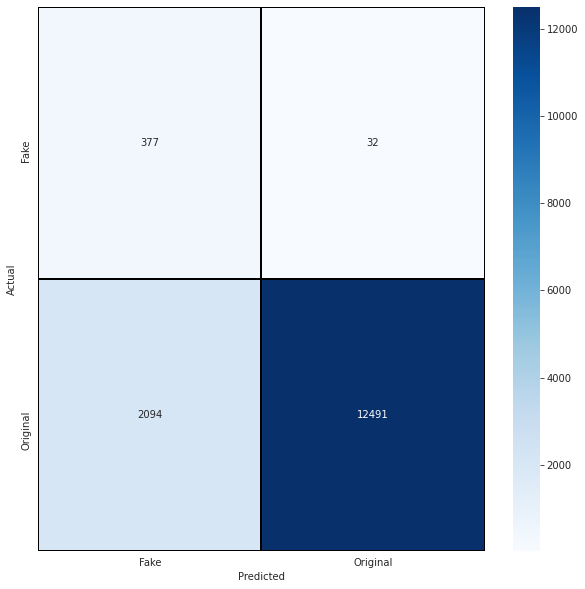

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(df['label']),
                                             df['label']))

weights={}
for index, weight in enumerate(class_weights) :
  weights[index]=weight

CNN(1 Layer)+BiLSTM(2 Layers)

In [ ]:
from sklearn.utils import class_weight

In [ ]:
modelv2 = Sequential()
modelv2.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv2.add(Conv1D(filters = 4,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv2.add( MaxPooling1D(pool_size=5))
modelv2.add(Dropout(rate=CDROP_RATE))
modelv2.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
modelv2.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25)))
modelv2.add(Dense(units = 32 , activation = 'relu'))
modelv2.add(Dense(1, activation='sigmoid'))
modelv2.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [ ]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(df['label']),
                                             df['label']))

weights={}
for index, weight in enumerate(class_weights) :
  weights[index]=weight

In [ ]:
weights

{0: 19.236720554272516, 1: 0.5133427831874768}

In [ ]:
class_weight = {0: 10.,
                1: 1.}

In [ ]:
class_weight

{0: 15.0, 1: 1.0}

In [ ]:
history = modelv2.fit(x_train, y_train,
                      class_weight=class_weight,
          validation_data = (X_test, y_test),
          epochs = 10,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

137/137 [==============================] - 282s 2s/step - loss: 0.2743 - accuracy: 0.9455 - val_loss: 0.1251 - val_accuracy: 0.9552


In [ ]:
print("Accuracy of the model on Training Data is - " , modelv2.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv2.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 69s 63ms/step - loss: 0.0997 - accuracy: 0.9620
Accuracy of the model on Training Data is -  96.20386958122253 %
469/469 [==============================] - 30s 64ms/step - loss: 0.1251 - accuracy: 0.9552
Accuracy of the model on Testing Data is -  95.51820755004883 %


In [ ]:
print("Accuracy of the model on Training Data is - " , modelv2.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv2.evaluate(X_test,y_test)[1]*100 , "%")

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training cost', 'Validation cost'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.title('Cost Curves',fontsize=16)
 
#Plot accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
epochs = [i for i in range(19)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = modelv2.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.33      0.77      0.46       372
    Not Fake       0.99      0.96      0.98     14622

    accuracy                           0.96     14994
   macro avg       0.66      0.86      0.72     14994
weighted avg       0.98      0.96      0.96     14994



In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[  286,    86],
       [  586, 14036]])

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

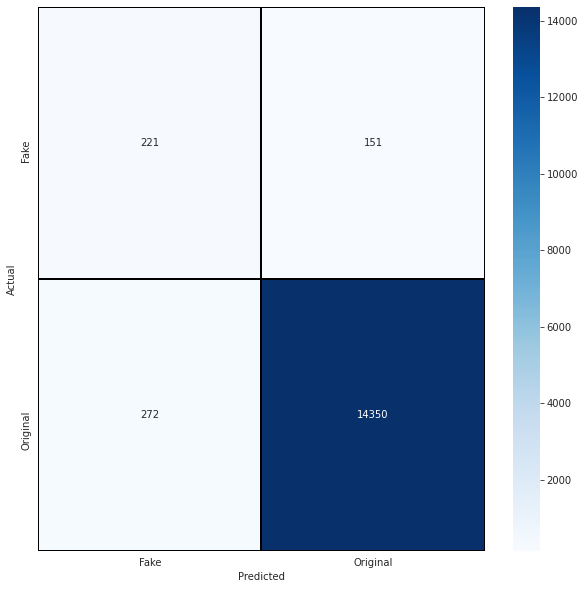

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

(With 3 Filters) Cnn+Pooling+Dropout+Cnn+Pool+Dropout+2BiLstm

In [ ]:
modelv3 = Sequential()
modelv3.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv3.add(Conv1D(filters = 4,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv3.add( MaxPooling1D(pool_size=5))
modelv3.add(Dropout(rate=CDROP_RATE))
modelv3.add(Conv1D(filters = 8,kernel_regularizer=l2(CREG), 
              kernel_size=(5), 
              padding= "valid", 
              strides=1,activation='relu'))
modelv3.add( MaxPooling1D(pool_size=5))
modelv3.add(Dropout(rate=CDROP_RATE))
modelv3.add(Bidirectional(LSTM(units=64 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
modelv3.add(Bidirectional(LSTM(units=32 , recurrent_dropout = 0.1 , dropout = 0.25)))
modelv3.add(Dense(units = 32 , activation = 'relu'))
modelv3.add(Dense(1, activation='sigmoid'))
modelv3.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
modelv3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 4)            3604      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 60, 4)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 4)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 56, 8)             168       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 11, 8)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 8)            

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [ ]:
history = modelv3.fit(x_train, y_train,
                      class_weight = weights,
          validation_data = (X_test, y_test),
          epochs = 10,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/10
137/137 [==============================] - 86s 532ms/step - loss: 0.5585 - accuracy: 0.7580 - val_loss: 0.3362 - val_accuracy: 0.8781
Epoch 2/10
137/137 [==============================] - 73s 537ms/step - loss: 0.4038 - accuracy: 0.8308 - val_loss: 0.5398 - val_accuracy: 0.7711
Epoch 3/10
137/137 [==============================] - 74s 537ms/step - loss: 0.3819 - accuracy: 0.8363 - val_loss: 0.4977 - val_accuracy: 0.7506
Epoch 4/10
137/137 [==============================] - 73s 532ms/step - loss: 0.3635 - accuracy: 0.8273 - val_loss: 0.2480 - val_accuracy: 0.8996
Epoch 5/10
137/137 [==============================] - 73s 536ms/step - loss: 0.3402 - accuracy: 0.8766 - val_loss: 0.2017 - val_accuracy: 0.9144
Epoch 6/10
137/137 [==============================] - 72s 523ms/step - loss: 0.3191 - accuracy: 0.8764 - val_loss: 0.3360 - val_accuracy: 0.8587
Epoch 7/10
137/137 [==============================] - 71s 515ms/step - loss: 0.2953 - accuracy: 0.8736 - val_loss: 0.3844 - val_ac

In [ ]:
print("Accuracy of the model on Training Data is - " , modelv3.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv3.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 23s 21ms/step - loss: 0.2322 - accuracy: 0.8954
Accuracy of the model on Training Data is -  89.54063653945923 %
469/469 [==============================] - 9s 20ms/step - loss: 0.2550 - accuracy: 0.8872
Accuracy of the model on Testing Data is -  88.72215747833252 %


In [ ]:
pred = modelv3.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.16      0.76      0.26       391
    Not Fake       0.99      0.89      0.94     14603

    accuracy                           0.89     14994
   macro avg       0.57      0.82      0.60     14994
weighted avg       0.97      0.89      0.92     14994



In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[  296,    95],
       [ 1596, 13007]])

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

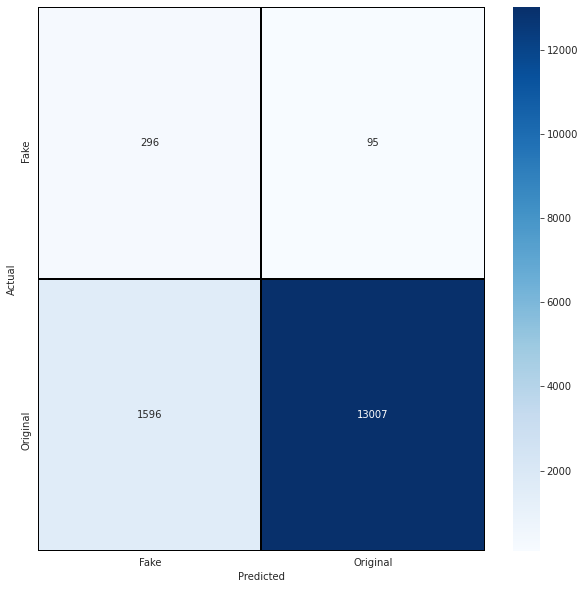

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

CNN+ LSTM

In [ ]:
modelv4 = Sequential()
modelv4.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv4.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv4.add( MaxPooling1D(pool_size=5))
modelv4.add(Dropout(rate=CDROP_RATE))
modelv4.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
modelv4.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25))
modelv4.add(Dense(units = 32 , activation = 'relu'))
modelv4.add(Dense(1, activation='sigmoid'))
modelv4.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [ ]:
class_weight = {0: 12,
                1: 1}

In [ ]:
history = modelv4.fit(x_train, y_train,
                      class_weight = class_weight,
          validation_data = (X_test, y_test),
          epochs = 5,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/5
137/137 [==============================] - 150s 1s/step - loss: 0.3760 - accuracy: 0.9514 - val_loss: 0.2390 - val_accuracy: 0.9647
Epoch 2/5
137/137 [==============================] - 149s 1s/step - loss: 0.3598 - accuracy: 0.9622 - val_loss: 0.2243 - val_accuracy: 0.9762
Epoch 3/5
137/137 [==============================] - 149s 1s/step - loss: 0.3495 - accuracy: 0.9640 - val_loss: 0.2279 - val_accuracy: 0.9747
Epoch 4/5
137/137 [==============================] - 149s 1s/step - loss: 0.3813 - accuracy: 0.9581 - val_loss: 0.2229 - val_accuracy: 0.9779
Epoch 5/5
137/137 [==============================] - 149s 1s/step - loss: 0.3514 - accuracy: 0.9605 - val_loss: 0.2198 - val_accuracy: 0.9758


In [ ]:
print("Accuracy of the model on Training Data is - " , modelv4.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv4.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 40s 36ms/step - loss: 0.2026 - accuracy: 0.9831
Accuracy of the model on Training Data is -  98.31346869468689 %
469/469 [==============================] - 17s 37ms/step - loss: 0.2198 - accuracy: 0.9758
Accuracy of the model on Testing Data is -  97.57903218269348 %


In [ ]:
pred = modelv4.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.51      0.74      0.60       372
    Not Fake       0.99      0.98      0.99     14622

    accuracy                           0.98     14994
   macro avg       0.75      0.86      0.79     14994
weighted avg       0.98      0.98      0.98     14994



In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[  275,    97],
       [  266, 14356]])

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

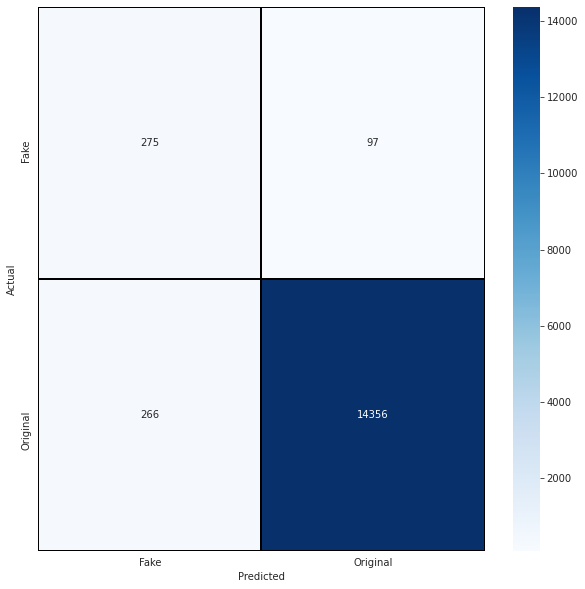

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")